In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


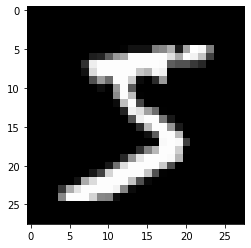

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [7]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [8]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] 
y_test = np.eye(num_classes)[y_test]

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])

In [11]:
batch_size = 128 
epochs = 20

history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, 
validation_data=(x_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 34s 64ms/step - loss: 0.2586 - accuracy: 0.9195 - val_loss: 0.1129 - val_accuracy: 0.9657
Epoch 2/20
469/469 [==============================] - 34s 73ms/step - loss: 0.1047 - accuracy: 0.9670 - val_loss: 0.0912 - val_accuracy: 0.9712
Epoch 3/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0759 - accuracy: 0.9768 - val_loss: 0.0653 - val_accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 33s 70ms/step - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.0754 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 35s 75ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0662 - val_accuracy: 0.9823
Epoch 6/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0600 - val_accuracy: 0.9829
Epoch 7/20
469/469 [==============================] - 33s 70ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0743 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09339874237775803
Test accuracy: 0.9836000204086304
